# Clustering

# Objective :- The goal is to identify customer segments via clustering.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df = pd.read_excel(r"C:\Users\jigne\Downloads\EastWestAirlines.xlsx")

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [5]:
df.shape

(3999, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
df.nunique()

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

In [8]:
df.rename(columns = {'ID#':'ID','Award?':'Award'}, inplace = True)

In [9]:
df.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [10]:
duplicate = df.duplicated()
sum(duplicate)

0

In [11]:
df.drop(columns = ['ID','Award'], inplace = True)

In [12]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


Balance                 AxesSubplot(0.125,0.125;0.065678x0.755)
Qual_miles           AxesSubplot(0.203814,0.125;0.065678x0.755)
cc1_miles            AxesSubplot(0.282627,0.125;0.065678x0.755)
cc2_miles            AxesSubplot(0.361441,0.125;0.065678x0.755)
cc3_miles            AxesSubplot(0.440254,0.125;0.065678x0.755)
Bonus_miles          AxesSubplot(0.519068,0.125;0.065678x0.755)
Bonus_trans          AxesSubplot(0.597881,0.125;0.065678x0.755)
Flight_miles_12mo    AxesSubplot(0.676695,0.125;0.065678x0.755)
Flight_trans_12      AxesSubplot(0.755508,0.125;0.065678x0.755)
Days_since_enroll    AxesSubplot(0.834322,0.125;0.065678x0.755)
dtype: object

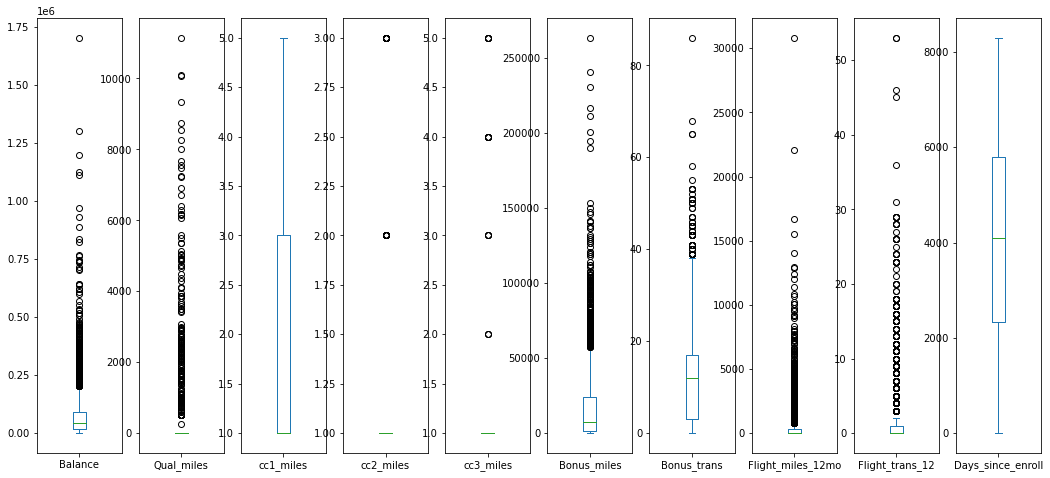

In [13]:
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (18, 8))

In [14]:
!pip install feature_engine

In [15]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method = 'iqr',
                    tail = 'both', # cap left, right or both tails 
                    fold = 1.5,
                    variables = ['Balance'])
df['Balance'] = winsor.fit_transform(df[['Balance']])

In [16]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method = 'iqr',
                    tail = 'both',
                    fold = 1.5,
                    variables = ['Bonus_miles'])
df['Bonus_miles'] = winsor.fit_transform(df[['Bonus_miles']])

In [17]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method = 'iqr',
                    tail = 'both',
                    fold = 1.5,
                    variables = ['Bonus_trans'])
df['Bonus_trans'] = winsor.fit_transform(df[['Bonus_trans']])

In [18]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method = 'iqr',
                    tail = 'both',
                    fold = 1.5,
                    variables = ['Flight_miles_12mo'])
df['Flight_miles_12mo'] = winsor.fit_transform(df[['Flight_miles_12mo']])

In [19]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method = 'iqr',
                    tail = 'both',
                    fold = 1.5,
                    variables = ['Flight_trans_12'])
df['Flight_trans_12'] = winsor.fit_transform(df[['Flight_trans_12']])

Balance                 AxesSubplot(0.125,0.125;0.065678x0.755)
Qual_miles           AxesSubplot(0.203814,0.125;0.065678x0.755)
cc1_miles            AxesSubplot(0.282627,0.125;0.065678x0.755)
cc2_miles            AxesSubplot(0.361441,0.125;0.065678x0.755)
cc3_miles            AxesSubplot(0.440254,0.125;0.065678x0.755)
Bonus_miles          AxesSubplot(0.519068,0.125;0.065678x0.755)
Bonus_trans          AxesSubplot(0.597881,0.125;0.065678x0.755)
Flight_miles_12mo    AxesSubplot(0.676695,0.125;0.065678x0.755)
Flight_trans_12      AxesSubplot(0.755508,0.125;0.065678x0.755)
Days_since_enroll    AxesSubplot(0.834322,0.125;0.065678x0.755)
dtype: object

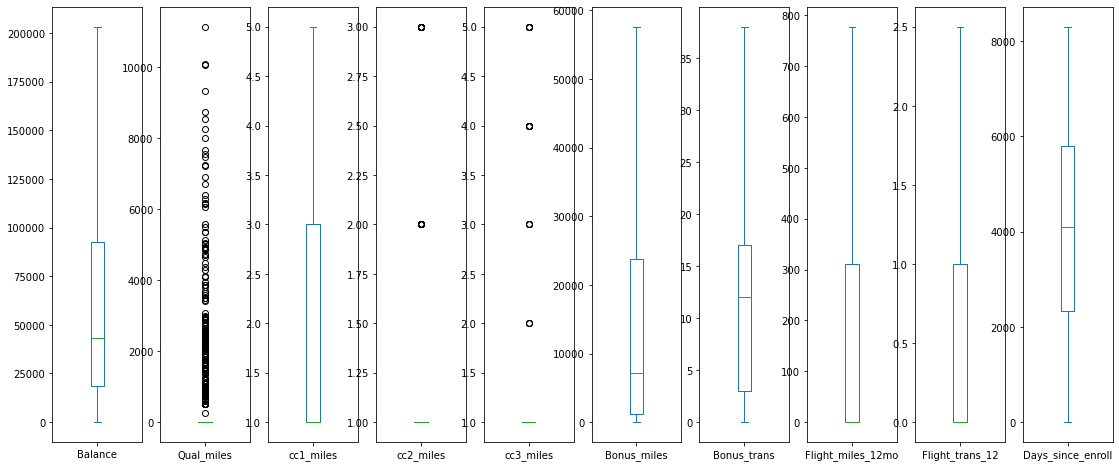

In [20]:
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (19, 8))

In [21]:
df.cc1_miles.value_counts()

1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64

In [22]:
df.cc2_miles.value_counts()

1    3956
2      28
3      15
Name: cc2_miles, dtype: int64

In [23]:
df.cc3_miles.value_counts()

1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64

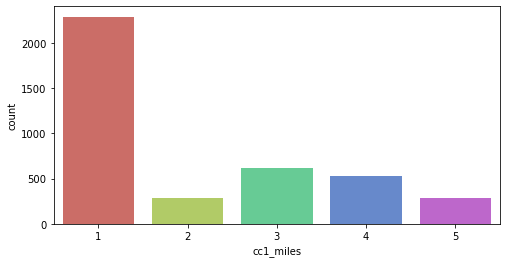

In [24]:
plt.figure(figsize = (8,4))
sns.countplot('cc1_miles', data = df,palette = 'hls')
plt.show()

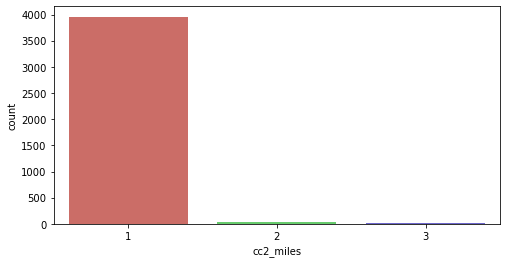

In [25]:
plt.figure(figsize = (8,4))
sns.countplot('cc2_miles', data = df , palette = 'hls')
plt.show()

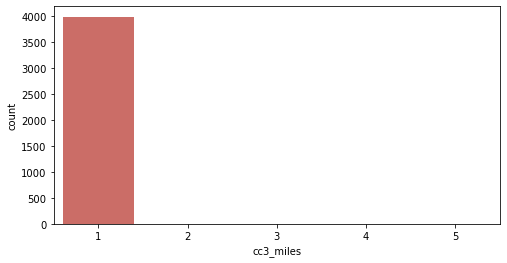

In [26]:
plt.figure(figsize = (8,4))
sns.countplot('cc3_miles', data = df,palette = 'hls')
plt.show()

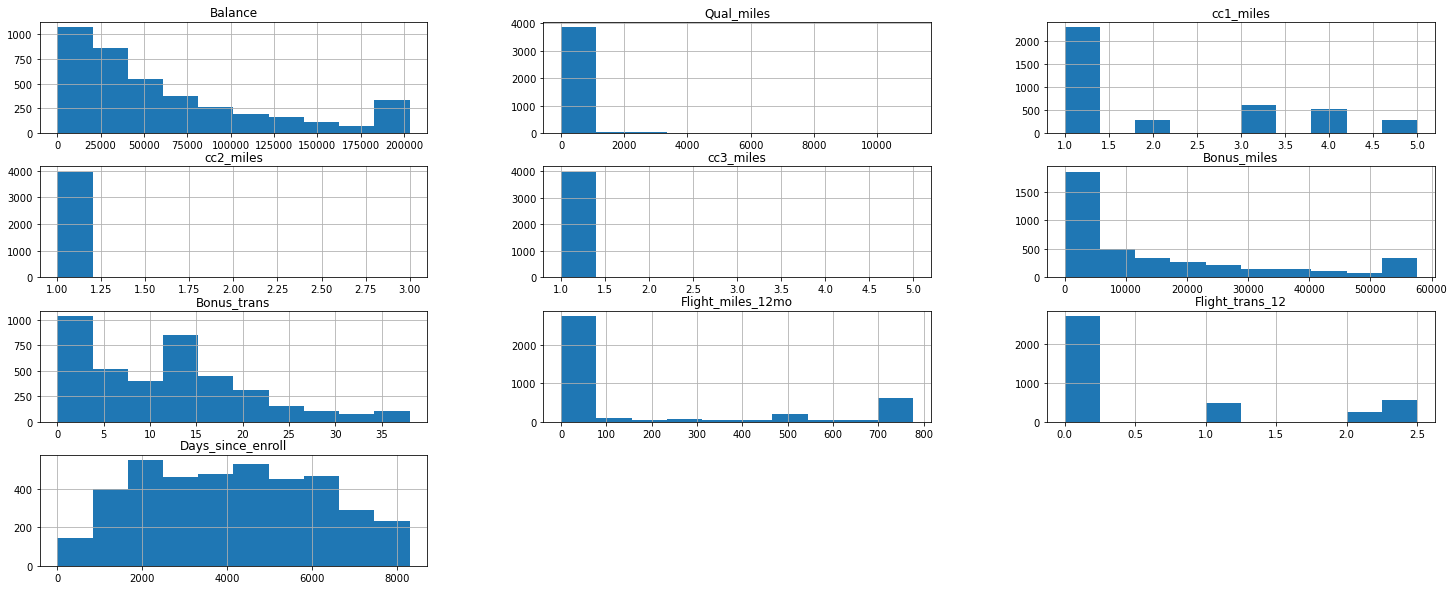

In [27]:
df.hist(figsize=(25,10));

In [28]:
df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.105882,0.446510,-0.015658,0.036054,0.494422,0.409017,0.297045,0.295565,0.286143
Qual_miles,0.105882,1.000000,0.007931,-0.013923,-0.007779,0.034646,0.051616,0.146498,0.149166,0.017312
cc1_miles,0.446510,0.007931,1.000000,-0.068223,0.060555,0.912531,0.627786,0.098786,0.087618,0.230849
cc2_miles,-0.015658,-0.013923,-0.068223,1.000000,-0.006166,0.001866,0.064435,0.012451,0.018273,-0.005807
cc3_miles,0.036054,-0.007779,0.060555,-0.006166,1.000000,0.136254,0.100905,0.018554,0.011546,0.010832
Bonus_miles,0.494422,0.034646,0.912531,0.001866,0.136254,1.000000,0.663558,0.205801,0.193669,0.217320
Bonus_trans,0.409017,0.051616,0.627786,0.064435,0.100905,0.663558,1.000000,0.310543,0.308518,0.170308
Flight_miles_12mo,0.297045,0.146498,0.098786,0.012451,0.018554,0.205801,0.310543,1.000000,0.942734,0.095019
Flight_trans_12,0.295565,0.149166,0.087618,0.018273,0.011546,0.193669,0.308518,0.942734,1.000000,0.091898
Days_since_enroll,0.286143,0.017312,0.230849,-0.005807,0.010832,0.217320,0.170308,0.095019,0.091898,1.000000


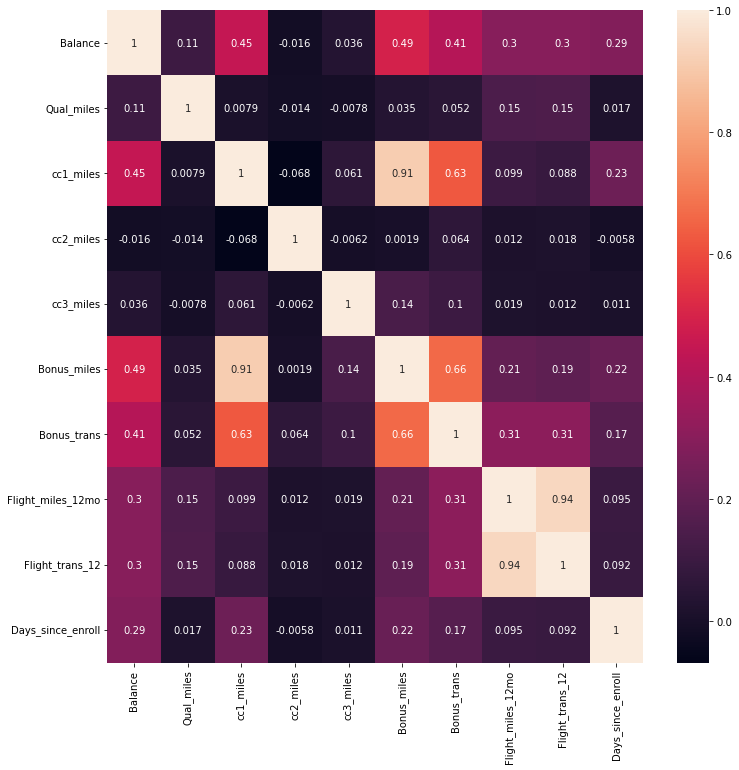

In [29]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),annot = True)
plt.show()

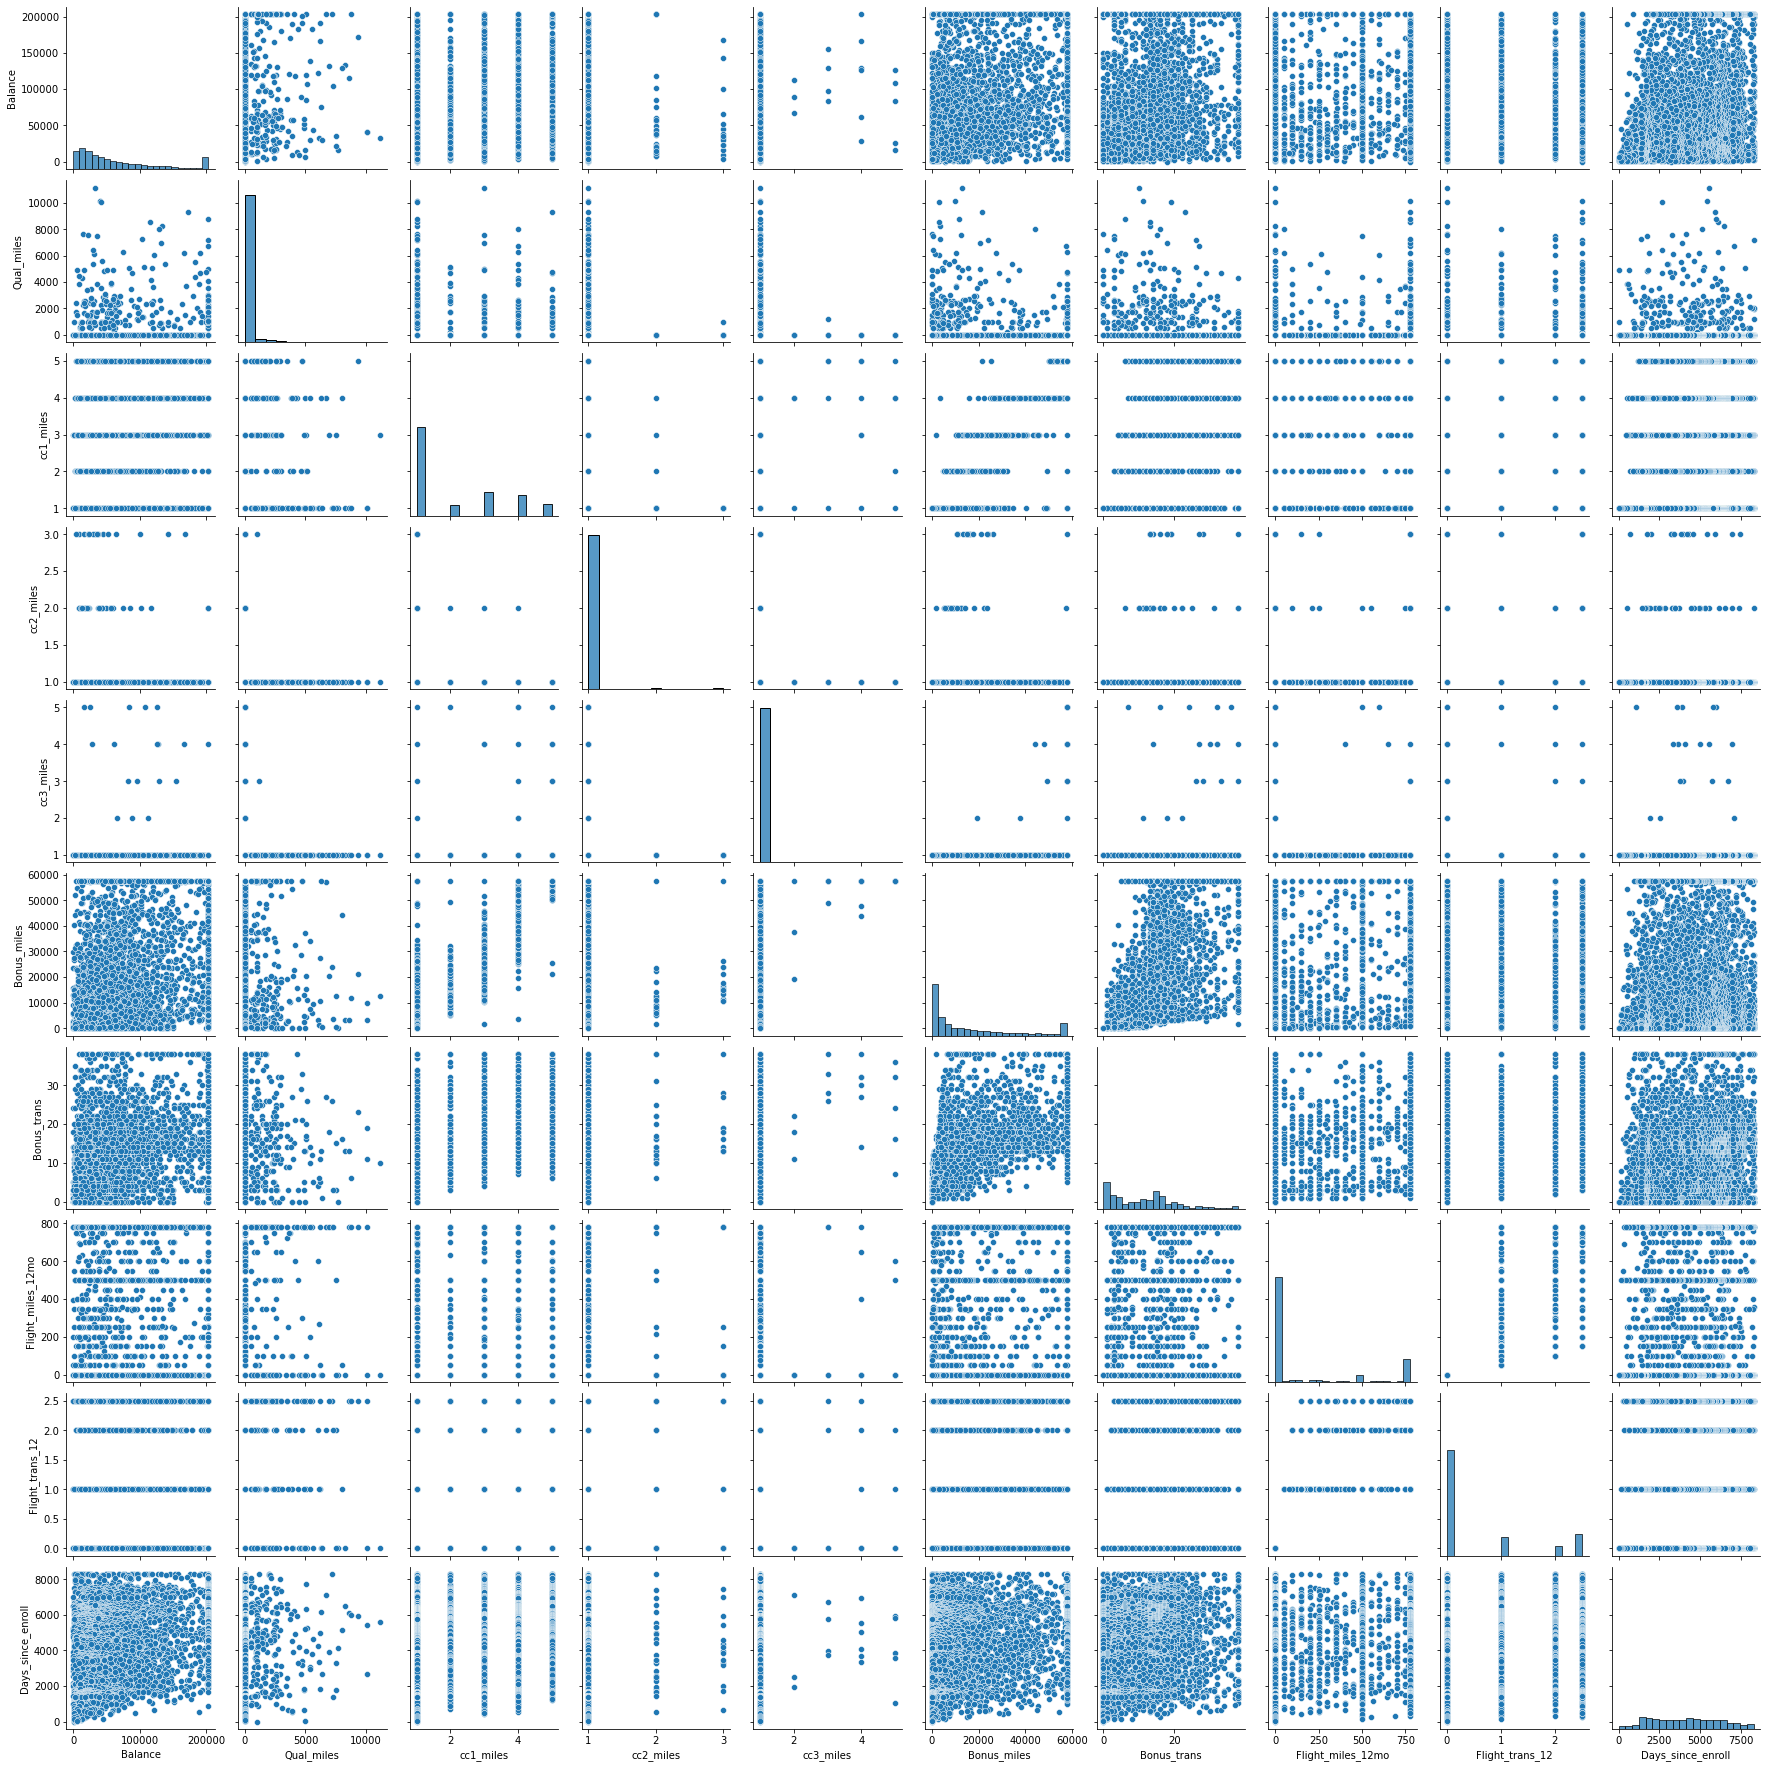

In [30]:
sns.pairplot(df)

In [31]:
from sklearn.cluster import KMeans

In [32]:
kmeans=KMeans().fit(df)

In [33]:
TWSS = []
k = list(range(1,20))

In [34]:
for i in k:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=3)
    kmeans.fit(df)
    TWSS.append(kmeans.inertia_)

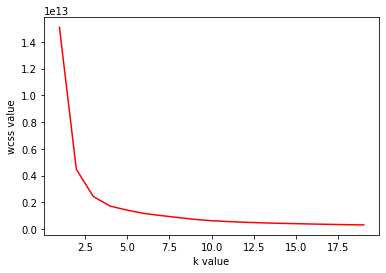

In [35]:
plt.plot(k,TWSS,color="red")
plt.xlabel("k value")
plt.ylabel("wcss value")
plt.show()

In [36]:
kmeans=KMeans(n_clusters=4,init="k-means++").fit(df)

In [37]:
cluster=kmeans.labels_
cluster

array([2, 2, 2, ..., 0, 0, 2])

In [38]:
df["cluster_no"]=cluster
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster_no
0,28143.0,0,1,1,1,174.0,1.0,0.0,0.0,7000,2
1,19244.0,0,1,1,1,215.0,2.0,0.0,0.0,6968,2
2,41354.0,0,1,1,1,4123.0,4.0,0.0,0.0,7034,2
3,14776.0,0,1,1,1,500.0,1.0,0.0,0.0,6952,2
4,97752.0,0,4,1,1,43300.0,26.0,777.5,2.5,6935,3


In [39]:
df.cluster_no.value_counts()

2    1867
0    1083
3     611
1     438
Name: cluster_no, dtype: int64

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch

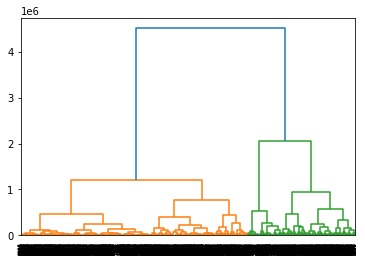

In [41]:
dendogram=sch.dendrogram(sch.linkage(df,method="ward"))
plt.show()

In [42]:
from sklearn.decomposition import PCA

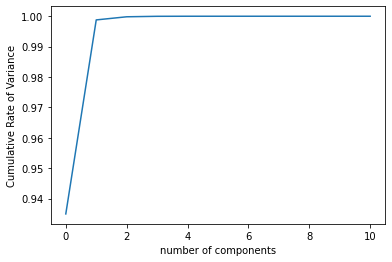

In [43]:
pca=PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel("number of components")
plt.ylabel("Cumulative Rate of Variance")
plt.show()

In [44]:
pca=PCA(n_components=2).fit(df)

In [45]:
pca.explained_variance_ratio_

array([0.93497917, 0.06381457])